# Анализ результатов Независимого опроса студентов БГУИР

Не так давно мы провели [опрос](https://vk.com/imagine_ai?w=wall-176000119_17), основной целью которого было узнать, что студенты БГУИР думают о своём университете и том образовании, которое получают. Всего за неделю  в опросе приняли участие около 850 человек, форма распространялась через bsuir-related беседы и сообщества, а участие, само собой, было анонимным и добровольным.  


Несмотря на  попытки сохранить баланс между детальностью вопросов и загруженностью, а также достичь максимально возможной репрезентативности выборки, такой метод сбора информации не застрахован от ошибок и неточностей. Здесь мы не будем заниматься интерпретацией результатов, пытаться установить причинно-следственные связи и делать какие-либо выводы, а лишь проведём первичную обработку и анализ полученных данных.

## Загрузка и предобработка данных

In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [41]:
def format_func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

In [42]:
data = pd.read_csv('bsuir-survey.csv')

In [43]:
data = data.drop(columns=["Timestamp"]).drop_duplicates()

In [44]:
print("{} человек приняли участие в опросе".format(data.shape[0]))

572 человек приняли участие в опросе


In [45]:
mlb = MultiLabelBinarizer()

lab_columns_data = mlb.fit_transform(
    data['Если сдаёте чужие работы, то почему?'].fillna("Не сдаю чужие работы").apply(lambda x: x.split(', ')))
lab_columns_names = mlb.classes_

data = data.join(pd.DataFrame(lab_columns_data, columns=lab_columns_names))

study_columns_data = mlb.fit_transform(
    data['Почему вы учитесь в БГУИРе?'].apply(lambda x: x.split(', ')))
study_columns_names = mlb.classes_

data = data.join(pd.DataFrame(study_columns_data, columns=study_columns_names))

candidates_columns_data = mlb.fit_transform(
    data['Каких кандидатов в президенты на выборах 2020 вы поддерживаете? (вы можете не отвечать на этот вопрос. Мы выделили наиболее популярных кандидатов по результатам интернет-опросов)'].fillna("Затрудняюсь ответить (кандидаты)").apply(lambda x: x.split(', ')))
candidates_columns_names = mlb.classes_

data = data.join(pd.DataFrame(candidates_columns_data, columns=candidates_columns_names))

In [46]:
for column in study_columns_names:
    data[column] = data[column].apply(lambda x: "Да" if x else "Нет")
    
for column in lab_columns_names:
    data[column] = data[column].apply(lambda x: "Да" if x else "Нет")
    
for column in candidates_columns_names:
    data[column] = data[column].apply(lambda x: "Да" if x else "Нет")

In [ ]:
data.columns = data.columns.str.strip()

In [47]:
data.head(n=5).T

,0,1,2,3,4
"Вы поступили туда, куда хотели?","Университет - да, специальность - нет","Да, и университет, и специальность","Да, и университет, и специальность","Да, и университет, и специальность","Да, и университет, и специальность"
Имеется ли у вас интерес к профессии?,Да,Да,Да,Да,Да
Работаете ли вы по профессии?,"Да, с 3 курса","Да, с 4 курса","Да, с 3 курса","Да, со 2 курса","Да, с 3 курса"
Почему вы учитесь в БГУИРе?,"Нужен диплом, Отсрочка от армии, Друзья/знаком...",Считаю БГУИР хорошим местом для получения знан...,Считаю БГУИР хорошим местом для получения знан...,Считаю БГУИР хорошим местом для получения знан...,Считаю БГУИР хорошим местом для получения знан...
Ощущаете ли вы нехватку возможности выбирать интересующие вас предметы для изучения?,Да,Да,Да,Да,Да
Сдаёте ли вы чужие работы?,"Да, но редко","Да, часто","Да, но редко","Да, часто","Да, но крайне редко"
"Если сдаёте чужие работы, то почему?","Нехватка времени, Отсутствие интереса к предмету",Не хватает знаний выполнить самостоятельно,"Нехватка времени, Отсутствие интереса к предмету","Нехватка времени, Отсутствие интереса к предмету","Нехватка времени, Отсутствие интереса к предмету"
Оцените качество методических пособий по учебным предметам (в том числе к лабораторным работам),Ужасное,Нормальное,Нормальное,Хорошее,Плохое
Считаете ли вы дистанционное обучение эффективным?,"Скорее да, чем нет","Скорее да, чем нет",Да,"Скорее нет, чем да","Скорее нет, чем да"
"Ситуация, когда предмет интересный, а подача плохая, возникает",Часто,Часто,Иногда,Часто,Иногда


## Общие статистики

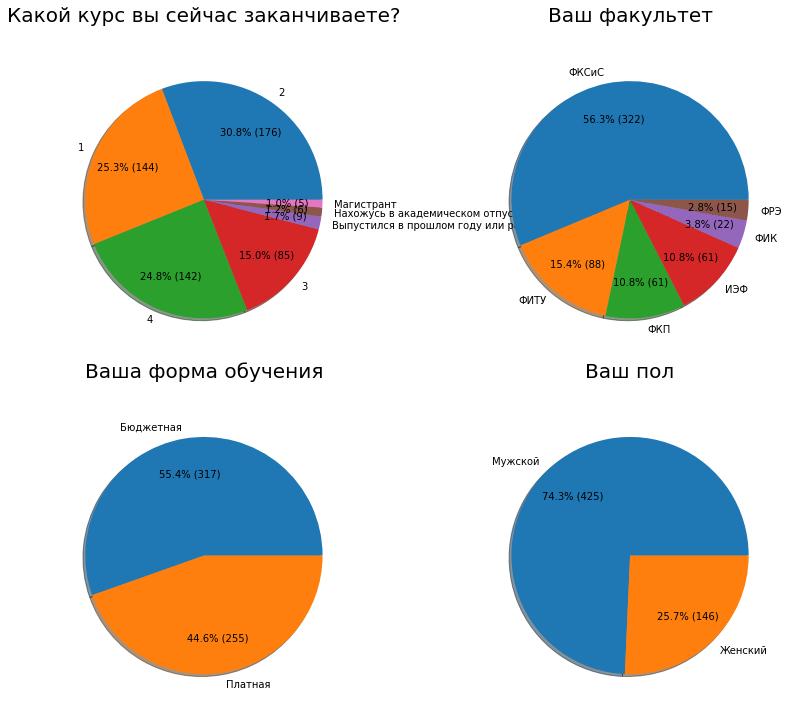

In [56]:
questions = ['Какой курс вы сейчас заканчиваете?', 'Ваш факультет', 'Ваша форма обучения', 'Ваш пол']

plt.figure(figsize=(14,12))

for i, question in enumerate(questions):
    
    plt.subplot(2, 2, i + 1)
    
    target = data[question].value_counts()
    labels = target.index.values
    plt.title(question, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=30)
    plt.pie(target, labels=labels, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)
    
plt.show()

## Ответы на остальные вопросы

Меняя question и сriterion внизу, можно получить ответы на большинство вопросов. Чуть-чуть дописав, можно узнать что угодно

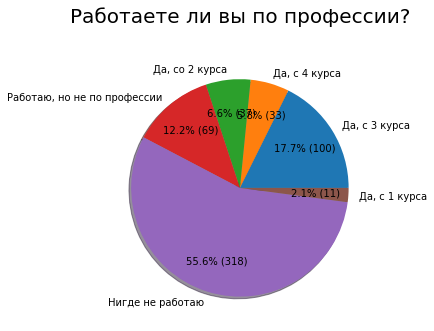

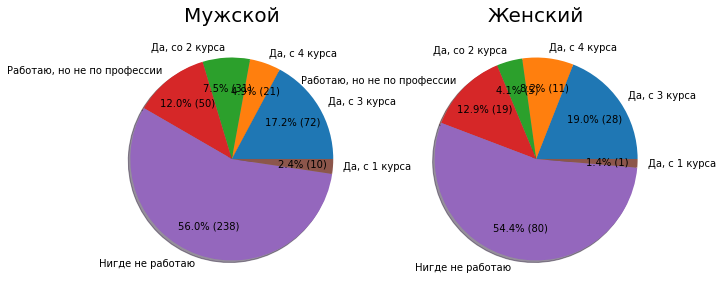

In [59]:
question = 'Работаете ли вы по профессии?'

index = data[question].unique()

plt.figure(figsize=(5, 5))

target = data[question].value_counts().reindex(index=index)
labels = target.index.values

plt.title(question, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=30)
plt.pie(target, labels=labels, autopct=lambda pct: format_func(pct, target),
        shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)

plt.show()

criterion = 'Ваш пол'
titles = data[criterion].value_counts().index.values
grouped_data = data.groupby(criterion)[question].value_counts()

plt.figure(figsize=(10, 20))

for i, title in enumerate(titles):
    
    plt.subplot(3, 2, i + 1)
    
    target = grouped_data[title].reindex(index=index)
    plt.title(title, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=10)
    plt.pie(target, labels=index, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)
    

plt.show()

## Multiple-Choice

In [71]:
candidates_columns_names = list(candidates_columns_names)
candidates_columns_names.remove('Затрудняюсь ответить (кандидаты)')

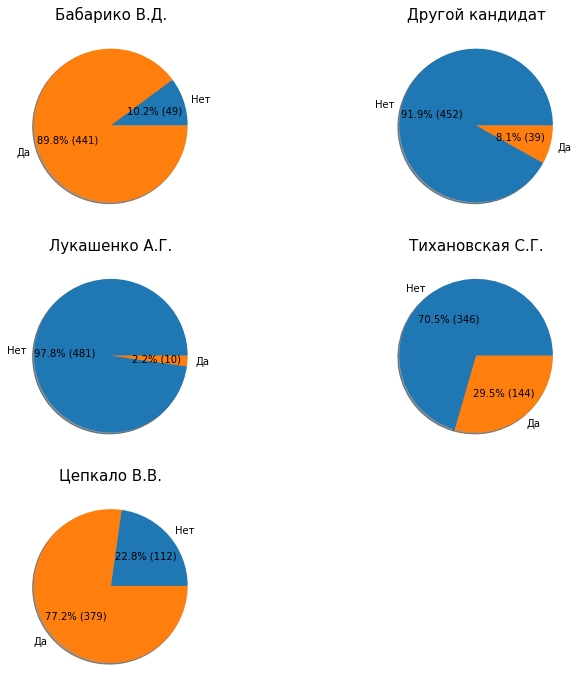

In [72]:
plt.figure(figsize=(12,12))

for i, reason in enumerate(candidates_columns_names):
    filtered_data = data[data['Затрудняюсь ответить (кандидаты)'] == 'Нет']
    plt.subplot(3, 2, i + 1)
    index = ['Нет', 'Да']
    target = filtered_data[reason].value_counts().reindex(index=index)
    plt.title(reason, loc = 'center', fontdict={'fontsize': 15, 'fontweight': 'light'}, pad=10)
    plt.pie(target, labels=index, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.6)
    
plt.show()

## Отзывы студентов

In [60]:
for i, review in enumerate(data['И напоследок: опишите БГУИР парой слов или одним предложением']):
    print(i, review)

0 Бугор
1 Ватрушка «Жанет»
2 Нет 
3 .
4 в этом месте можно найти что-то большее, чем просто корочку, но этого нужно искренне хотеть 🙂
5 наконец-то это закончилось
6 Хабза
7 Слово
8 ¯\_(ツ)_/¯
9 Лучший айти-вуз страны, который не смог в нормальную удалёнку
10 Жестко
11 интересная задумка тупое исполнение
12 БГУИР - один из лучших универов, дающих возможность в будущем работать не только за еду
13 Не хватает адекватных преподов 
14 Лучше *** макать в кефире, чем учиться в БГУИРе
15 вореые 
16 Бгуир 
17 Я тут учусь.
18 -
19 Говно залупа пенис хер
20 Имитация деятельности с попыткой придать важности происходящему 
21 На Ксисе самый крутой деканат:) А когда будет степендия как у всех вузов, а не самая низкая? 
22 норм
23 люблю пожёстче
24 Ящик
25 платим за трудности в жизни
26 -
27 ...
28 Хороший фундамент знаний
29 Интересно, но порой неактуально
30 ША РА ГА
31 -
32 Идея хорошая, реализация - как всегда
33 Классное место чтобы расти над собой
34 Норм
35 Типичный нормальный университет
36 Мн

In [61]:
for i,comment in enumerate(data['Хотите ещё что-нибудь добавить?'].dropna()):
    print(i, comment)

0  я ❤️ опросы

1 Свободу политзаключенным! С любовью, Валера 228.
2 Буду скучать по универу 
3 Спасибо!
4 Очень рад, что пару дней назад защитил диплом, надеюсь больше с нашей шарагой меня ничего связывать не будет, во всяком случае до тех пор, пока там не начнут происходить реально, так сказать, полезные и нужные изменения по процессу обучения.
5 И врагу не пожелаю здесь учиться. Вадымцев или как там его лох
6 Ненавижу матешу во всех ее проявлениях
7 Нет
8 Да. КЛИМЕНКОВ ЛУЧШИЙ!!! МЫ ВАС ЛЮБИМ!!! ОСИСП КРУТО! ЕВГЕНИЙ ИВАНОВИЧ <3<3<3
9 Нет
10 God Bless Bsuir(and Babariko)
11 Ищу собутыльницу (возможно на постоянную основу)
12 Жыве Беларусь!
13 Жыве Беларусь
14 Нет хуже президента, чем Александр 3 процента!
15 Иногда конкретно охуеваю
16 Хуита
17 Убрать бесполезные предметы и садистов-преподавателей (Глецевич И.И вообще маньяк)
18 с колой
19 настанут перемены
20 Спасибо вам, что делаете такие опросы.
21 Нет
22 Спасибо за опрос 
23 Сколько нужного и интересного, столько же и бесполезного

## The end :)